# Lets build our first Multilayer Perceptron from scratch in PyTorch!

In [2]:
!nvidia-smi

Tue Dec 31 20:20:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# imports

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# check if we have GPU!

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
device

device(type='cuda')

In [6]:
tensor = torch.randn(3,3,3,3,3,3)

In [7]:
# tensor

In [8]:
len(tensor.shape)

6

In [9]:
tensor = tensor.to(device)

In [10]:
tensor

tensor([[[[[[ 2.8522e+00, -1.4843e+00,  8.0570e-01],
            [-1.4313e+00,  1.5397e+00,  5.4232e-01],
            [-7.6816e-04, -1.5528e+00,  1.8721e-01]],

           [[ 1.2399e-01,  2.7457e-01,  1.0578e+00],
            [ 9.4526e-01,  9.7163e-01, -6.8348e-01],
            [-5.6633e-01, -7.6557e-01,  9.6452e-01]],

           [[-1.1920e+00,  1.0606e+00,  1.4209e+00],
            [ 3.3173e-01,  8.0733e-02, -5.8615e-01],
            [ 3.1485e-02, -4.0443e-01, -4.0301e-01]]],


          [[[ 1.6632e+00,  1.0154e+00,  1.2982e+00],
            [-8.2590e-01,  4.9863e-01,  4.3814e-01],
            [-9.8221e-01,  7.3842e-01, -5.6920e-01]],

           [[-1.4100e-01, -1.3707e+00, -9.0380e-01],
            [ 9.9287e-01,  1.1656e-01,  1.5275e+00],
            [ 7.2023e-01, -5.6279e-01,  1.4881e-01]],

           [[-6.7220e-01, -3.2678e-01,  2.3867e+00],
            [-2.2687e-01,  2.4415e-01,  1.3119e+00],
            [-4.9982e-01,  1.2798e+00,  1.0872e+00]]],


          [[[-1.4447e+00, -1.5

In [13]:
#tensor.numpy()

## Load our first dataset!

In [15]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5), (0.5))
     ])

train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           download = True,
                                           transform = transform
                                           )

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = 128,
                                           shuffle = True,
                                           drop_last = True
                                           )

test_dataset = torchvision.datasets.MNIST(root = './data',
                                         train = False,
                                         download = True,
                                         transform = transform
                                         )

test_loader = torch.utils.data.DataLoader(test_dataset,
                                         batch_size = 128,
                                         shuffle = False,
                                         drop_last = True
                                         )

In [16]:
tuple_0 = train_dataset[0]

In [17]:
tuple_0

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [18]:
tuple_0[1]

5

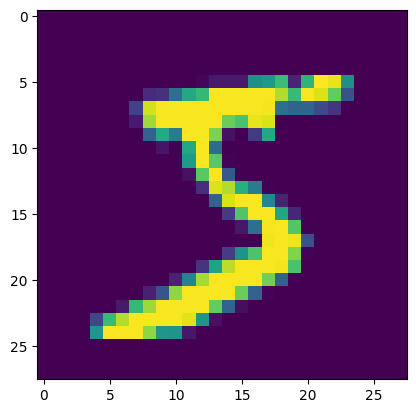

In [19]:
plt.imshow(tuple_0[0].squeeze().numpy())

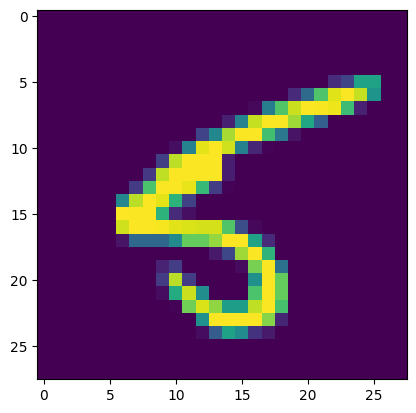

In [20]:
plt.imshow((next(iter(train_loader)))[0][123].squeeze().numpy())

## A little turnoff:

In [21]:
# how to create your own PyTorch dataset?

import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
type(x_train)

numpy.ndarray

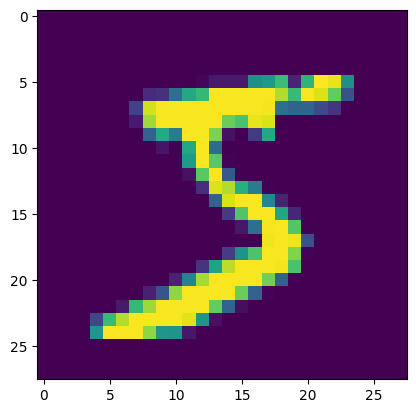

In [23]:
plt.imshow(x_train[0])

In [24]:
y_train[0]

5

In [25]:
# create custom dataset class

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data, target):
        self.data = torch.from_numpy(data).squeeze(0).float()
        self.target = torch.from_numpy(target).long()

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        return x, y

    def __len__(self):
        return len(self.data)

In [26]:
my_train_dataset = MyDataset(x_train, y_train)
my_train_loader = torch.utils.data.DataLoader(train_dataset,
                                              batch_size = 128,
                                              shuffle=True)

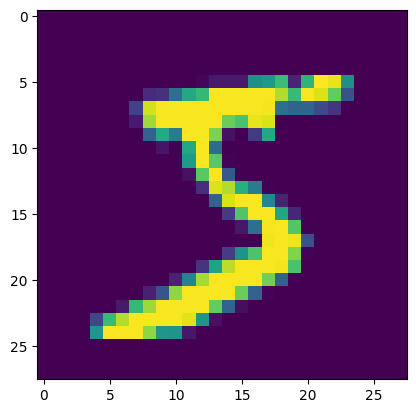

In [27]:
plt.imshow(my_train_dataset[0][0].numpy())

# Back to Initial Dataset

In [28]:
batch = next(iter(train_loader))

In [29]:
batch[0].view(128,-1).shape

torch.Size([128, 784])

In [30]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_in = torch.nn.Linear(in_features = 28 * 28, out_features = 42)
        self.fc_out = torch.nn.Linear(in_features = 42, out_features = 10)

    def forward(self, x):
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)
        x = self.fc_in(x)
        x = torch.nn.functional.sigmoid(x)
        x = self.fc_out(x)
        x = torch.nn.functional.softmax(x, dim = 1)

        return x

In [31]:
28*28

784

In [32]:
torch.nn.functional.softmax(torch.tensor([12, 32, 7, 28]).float()).sum()

<ipython-input-32-5d3c94977884>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.softmax(torch.tensor([12, 32, 7, 28]).float()).sum()


tensor(1.)

In [33]:
model = MLP()

In [34]:
model

MLP(
  (fc_in): Linear(in_features=784, out_features=42, bias=True)
  (fc_out): Linear(in_features=42, out_features=10, bias=True)
)

In [35]:
model = model.to(device) #send the model to GPU

In [36]:
#what are we going to optimize?
criterion = torch.nn.CrossEntropyLoss() #if you have a classification task and don't know what to do - use `CrossEntropyLoss`

#how are we going to optimize it?
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #if you just don't know what to do - use `Adam` optimizer (or `SGD`)

In [37]:
model.fc_in.weight.shape

torch.Size([42, 784])

In [38]:
model.fc_in.bias.shape

torch.Size([42])

In [39]:
model = model.cpu()

In [40]:
batch = next(iter(train_loader))

In [41]:
data, target = batch

In [42]:
data = data.view(data.shape[0], -1)

In [43]:
data.shape

torch.Size([128, 784])

In [44]:
model.fc_in.weight.shape

torch.Size([42, 784])

In [45]:
hidden_layer_output = data@model.fc_in.weight.T + model.fc_in.bias

In [46]:
hidden_layer_output.shape

torch.Size([128, 42])

In [47]:
last_layer_output = torch.nn.functional.sigmoid(hidden_layer_output)

In [48]:
last_layer_output = last_layer_output@model.fc_out.weight.T + model.fc_out.bias
normalzied_layer_output = torch.nn.functional.softmax(last_layer_output, dim = 1)

In [49]:
normalzied_layer_output

tensor([[0.1333, 0.0659, 0.0652,  ..., 0.0822, 0.0611, 0.1493],
        [0.1473, 0.0604, 0.0666,  ..., 0.0892, 0.0601, 0.1339],
        [0.1382, 0.0592, 0.0645,  ..., 0.0856, 0.0603, 0.1484],
        ...,
        [0.1428, 0.0657, 0.0650,  ..., 0.0876, 0.0619, 0.1368],
        [0.1408, 0.0614, 0.0701,  ..., 0.0832, 0.0585, 0.1268],
        [0.1381, 0.0600, 0.0683,  ..., 0.0872, 0.0584, 0.1278]],
       grad_fn=<SoftmaxBackward0>)

In [50]:
normalzied_layer_output[0]

tensor([0.1333, 0.0659, 0.0652, 0.1081, 0.0900, 0.1592, 0.0858, 0.0822, 0.0611,
        0.1493], grad_fn=<SelectBackward0>)

In [51]:
model = model.to(device)

In [52]:
training_progress_loss = []
training_progress_accuracy = []

model.train() #this helps certain layers to differenciate training and evaluation mode, you'll learn about it later
for epoch in range(10):

    print("Epoch: ", epoch)

    train_loss = 0
    train_correct = 0

    for data, target in train_loader: # training per batch

        data, target = data.to(device), target.to(device) #send to GPU
        output = model(data)

        loss = criterion(output, target)
        train_loss += loss.item()

        _, preds = torch.max(output.data, 1)
        train_correct += torch.sum(preds == target).item()

        loss.backward() #calculate backpropagation path
        optimizer.step() #take a step on the loss surface
        optimizer.zero_grad() #we typically want to set the gradients to zero because PyTorch accumulates the gradients (we can leverage it!!!).

    train_loss /= len(train_loader) #divide by the number of batches in the loader
    training_progress_loss.append(train_loss)
    training_progress_accuracy.append(train_correct/len(train_dataset))
    print("Validation Accuracy: ", np.round(train_correct/len(train_dataset), 2))

Epoch:  0
Validation Accuracy:  0.7
Epoch:  1
Validation Accuracy:  0.88
Epoch:  2
Validation Accuracy:  0.92
Epoch:  3
Validation Accuracy:  0.93
Epoch:  4
Validation Accuracy:  0.93
Epoch:  5
Validation Accuracy:  0.94
Epoch:  6
Validation Accuracy:  0.94
Epoch:  7
Validation Accuracy:  0.94
Epoch:  8
Validation Accuracy:  0.95
Epoch:  9
Validation Accuracy:  0.95


In [53]:
training_progress_loss = []
training_progress_accuracy = []

val_progress_loss = []
val_progress_accuracy = []

for epoch in range(10):
    model.train() #this helps certain layers to differenciate training and evaluation mode, you'll learn about it later
    print("Epoch: ", epoch)

    train_loss = 0
    train_correct = 0

    for data, target in train_loader: # training per batch

        data, target = data.to(device), target.to(device) #send to GPU
        output = model(data)

        loss = criterion(output, target)
        train_loss += loss.item()

        _, preds = torch.max(output.data, 1)
        train_correct += torch.sum(preds == target).item()

        loss.backward() #calculate backpropagation path
        optimizer.step() #take a step on the loss surface
        optimizer.zero_grad() #we typically want to set the gradients to zero because PyTorch accumulates the gradients (we can leverage it!!!).

    train_loss /= len(train_loader) #divide by the number of batches in the loader
    training_progress_loss.append(train_loss)
    training_progress_accuracy.append(train_correct/len(train_dataset))
    print("Accuracy: ", np.round(train_correct/len(train_dataset), 2))

    val_loss = 0
    val_correct = 0

    model.eval()

    for data, target in test_loader:

        data, target = data.to(device), target.to(device) #send to GPU
        output = model(data)

        loss = criterion(output, target)
        val_loss += loss.item()

        _, preds = torch.max(output.data, 1)
        val_correct += torch.sum(preds == target).item()

    val_loss /= len(test_loader) #divide by the number of batches in the loader
    val_progress_loss.append(val_loss)
    val_progress_accuracy.append(val_correct/len(test_dataset))
    print("Validation Accuracy: ", np.round(val_correct/len(test_dataset), 2))

Epoch:  0
Accuracy:  0.95
Validation Accuracy:  0.95
Epoch:  1
Accuracy:  0.96
Validation Accuracy:  0.95
Epoch:  2
Accuracy:  0.96
Validation Accuracy:  0.95
Epoch:  3
Accuracy:  0.96
Validation Accuracy:  0.95
Epoch:  4
Accuracy:  0.96
Validation Accuracy:  0.95
Epoch:  5
Accuracy:  0.96
Validation Accuracy:  0.95
Epoch:  6
Accuracy:  0.96
Validation Accuracy:  0.95
Epoch:  7
Accuracy:  0.96
Validation Accuracy:  0.95
Epoch:  8
Accuracy:  0.96
Validation Accuracy:  0.95
Epoch:  9
Accuracy:  0.97
Validation Accuracy:  0.95


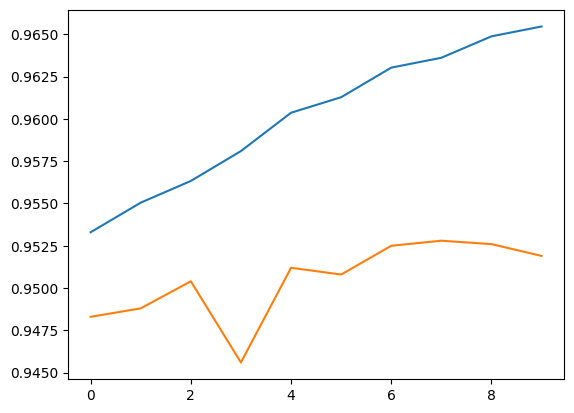

In [54]:
plt.plot(training_progress_accuracy)
plt.plot(val_progress_accuracy)

**TASK**: Now, when we can see that it learns something, try to implement your own validation loop (use `model.eval()` or `@torch.no_grad()`) ! If you are quick, close your social network tab 🧐, overfit your model badly, and implement Early Stopping algorithm!

## What about regularization techniques?

In [55]:
class SuperMLP(torch.nn.Module):
    def __init__(self, hidden_dim = 512):
        super().__init__()
        self.fc1 = torch.nn.Linear(28*28, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = torch.nn.Linear(hidden_dim, 10)
        self.dropout = torch.nn.Dropout(p = 0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        return x

In [56]:
model = SuperMLP().to(device)

In [57]:
def train_test(loader = train_loader,
               model = model,
               dataset = train_dataset,
               criterion = criterion,
               device = device,
               state = 'train'
               ):

    if state == 'train':
        model.train()
    elif state == 'eval':
        model.eval()
    else:
        print('State should be either "eval" or "train"')

    train_loss = 0
    train_correct = 0

    for data, target in loader:

        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)

        _, preds = torch.max(output.data, 1)

        train_loss += loss.item()
        train_correct += torch.sum(preds == target).item()

        if state == 'train':

            loss.backward()
            optimizer.step()
            model.zero_grad()

    train_loss /= len(loader)
    train_correct /= len(dataset)

    return train_loss, train_correct

In [58]:
#what are we going to optimize?
criterion = torch.nn.CrossEntropyLoss() #if you have a classification task and don't know what to do - use `CrossEntropyLoss`

#how are we going to optimize it?
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001) #if you just don't know what to do - use `Adam` optimizer

In [59]:
train_accuracies = []
test_accuracies = []

for epoch in range(10):

    train_loss, train_acc = train_test(state = 'train')
    test_loss, test_acc = train_test(loader = test_loader, dataset = test_dataset, state = 'eval')

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

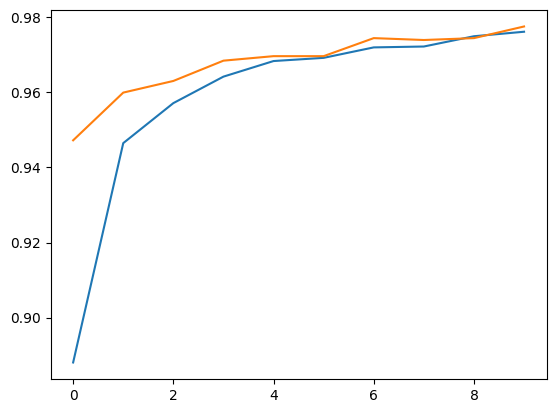

In [60]:
plt.plot(train_accuracies)
plt.plot(test_accuracies)

**TASK**: Try to paly with various `Dropout` rate. Add more regularization layers, such as: [`BatchNorm`](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) or [`LayerNorm`](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html)

## Custom Loss function

In [61]:
def my_cross_entropy(output, target):
    log_prob = -1.0 * torch.nn.functional.log_softmax(output, 1)
    loss = log_prob.gather(1, target.unsqueeze(1))
    loss = loss.mean()
    return loss

## Custom Activation Function

In [62]:
def torch_logistic(z):
    return 1. / (1. + torch.exp(-z))

# Convolutional Neural Networks

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')

In [64]:
#upload an image

from urllib.request import urlopen

resp = urlopen('http://apps.datalab.fit.cvut.cz/static/pewpew.png')
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

In [65]:
#upload an image from Google Drive
# image = cv2.imread('/content/drive/MyDrive/MVI/B211/pewpew.jpeg')

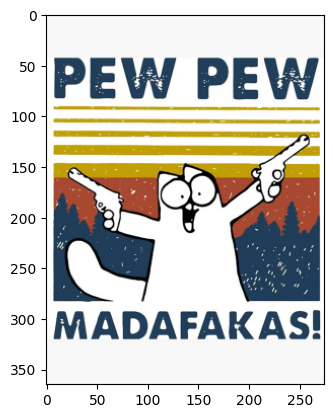

In [66]:
plt.imshow(image, cmap="Greys_r")

In [67]:
image.shape

(365, 274, 3)

In [68]:
#make it black and white
image_mono = image.mean(axis = 2)

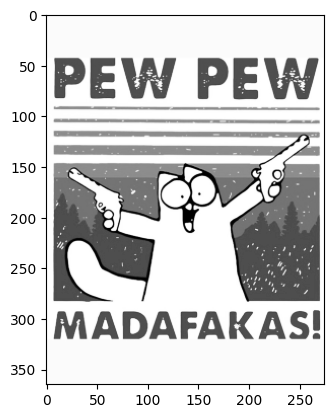

In [69]:
plt.imshow(image_mono, cmap="Greys_r")

In [70]:
def filter2d(image, kernel):

    output = np.zeros_like(image)

    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

In [71]:
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

In [72]:
image_output = filter2d(image_mono, (kernel))

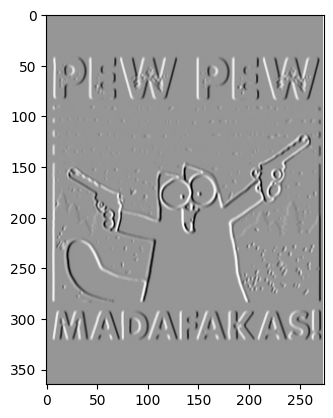

In [73]:
plt.imshow(image_output, cmap = 'Greys_r')

In [74]:
img = cv2.filter2D(image, -1, kernel)

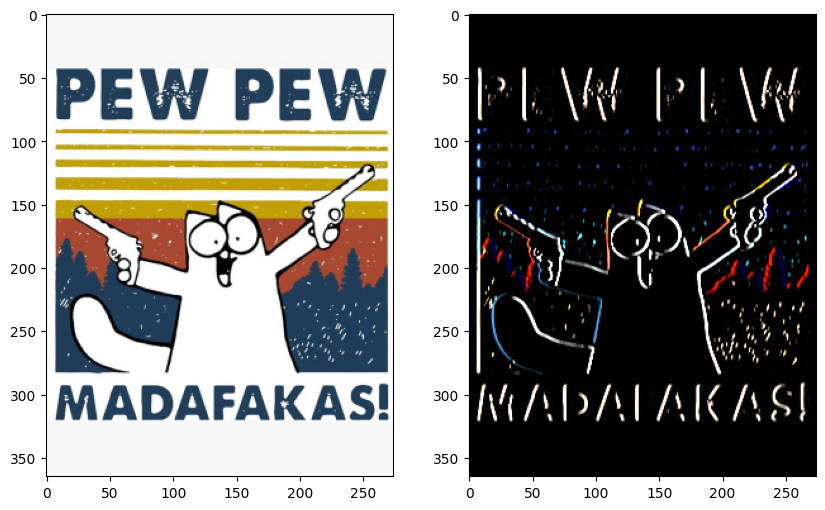

In [75]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(image)
ax[1].imshow(img)

## Lets upload more sophisticated dataset and try MLP!

In [76]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.CIFAR10(root = './data',
                                        train = True,
                                        download = True,
                                        transform = transform
                                        )


trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 128,
                                          shuffle = True,
                                          drop_last = True
                                          )

testset = torchvision.datasets.CIFAR10(root = './data',
                                       train = False,
                                       download = True,
                                       transform = transform
                                       )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 128,
                                         shuffle = False,
                                         drop_last = True
                                         )

classes = ('plane',
           'car',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck'
           )

100%|██████████| 170M/170M [00:03<00:00, 43.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


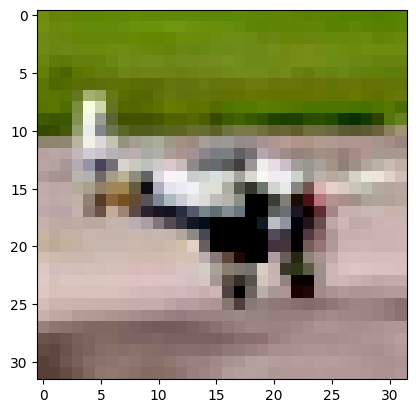

In [77]:
plt.imshow(next(iter(trainloader))[0][42].permute(1,2,0))

### MLP doean't work so well 😭

In [78]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3,3), padding = 1, stride=(1,1))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, padding = 1, kernel_size=(3,3))
        self.fc1 = nn.Linear(in_features=16 * 8 * 8, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [79]:
model = CNN()

In [80]:
model(torch.randn(1,3,32,32))

tensor([[ 0.0193, -0.0289,  0.0158,  0.0946,  0.0330,  0.0451, -0.0389, -0.0979,
          0.0306, -0.1423]], grad_fn=<AddmmBackward0>)

In [81]:
conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3,3), padding =1,  stride=(1,1))

In [82]:
conv2 = nn.Conv2d(in_channels=6, out_channels=16, padding =1, kernel_size=(3,3))

In [83]:
nn.MaxPool2d(2,2)(conv1(torch.randn(1,3,32,32))).shape

torch.Size([1, 6, 16, 16])

In [84]:
nn.MaxPool2d(2,2)(conv2(nn.MaxPool2d(2,2)(conv1(torch.randn(1,3,32,32))))).shape

torch.Size([1, 16, 8, 8])

### Dive into weight initialization:

In [85]:
def initialize_weights(m):
    if isinstance(m, nn.Conv2d):
            nn.init.kaiming_uniform_(m.weight.data, nonlinearity='relu')
            if m.bias is not None:
                    nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight.data, 1)
            nn.init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
            nn.init.kaiming_uniform_(m.weight.data)
            nn.init.constant_(m.bias.data, 0)

In [86]:
model = CNN()

In [87]:
model = model.apply(initialize_weights)

In [88]:
model = model.to(device)

In [89]:
model.conv1.weight[0]

tensor([[[-0.1877, -0.3215, -0.2779],
         [ 0.3303,  0.2427, -0.4247],
         [ 0.1781, -0.1229, -0.3371]],

        [[ 0.1595,  0.0303,  0.1598],
         [ 0.3990, -0.2608, -0.4458],
         [ 0.3161,  0.4300, -0.1383]],

        [[-0.4169, -0.4477, -0.0179],
         [-0.2750,  0.3879,  0.1624],
         [ 0.2987, -0.4333,  0.4546]]], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [90]:
model.conv1.weight[0]

tensor([[[-0.1877, -0.3215, -0.2779],
         [ 0.3303,  0.2427, -0.4247],
         [ 0.1781, -0.1229, -0.3371]],

        [[ 0.1595,  0.0303,  0.1598],
         [ 0.3990, -0.2608, -0.4458],
         [ 0.3161,  0.4300, -0.1383]],

        [[-0.4169, -0.4477, -0.0179],
         [-0.2750,  0.3879,  0.1624],
         [ 0.2987, -0.4333,  0.4546]]], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [91]:
def train(model, train_loader, optimizer):
    global device, epoch
    model.train()
    train_loss = 0
    train_correct = 0
    bnum = 0

    model.zero_grad()
    for i, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        output = model(data)

        loss = criterion(output, target)

        _, preds = torch.max(output.data, 1)

        train_loss += loss.item()
        train_correct += torch.sum(preds == target).item()

        loss.backward()
        optimizer.step()
        model.zero_grad()

    train_loss /= len(train_loader)

    print('\nTrain loss: {:.4f}'.format(
        train_loss,
        )
    )
    print('Train Accuracy: {:.2f} %'.format(
        train_correct/len(trainset)*100,
        )
    )

    return train_loss, train_correct/len(trainset)*100

In [92]:
def test(model, test_loader):
    global device
    model.eval()
    test_loss = 0
    test_correct = 0
    with torch.no_grad():
        for data, target in test_loader:

            data = data.to(device)
            target = target.to(device)

            output = model(data)

            test_loss += criterion(output, target).item()

            _, preds = torch.max(output.data, 1)

            test_correct += torch.sum(preds == target).item()

    test_loss /= len(test_loader)

    print('\nValidation loss: {:.4f}'.format(
        test_loss
        )
    )
    print('Validation Accuracy: {:.2f} %'.format(
        test_correct/len(testset)*100,
        )
    )

    return test_loss, test_correct/len(testset)*100

In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 20, eta_min = 0, verbose = False)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [94]:
num_epochs = 20
train_loss_output = []
val_loss_output = []

for epoch in range(1, num_epochs + 1):
    tr_loss = train(model=model,
                    train_loader=trainloader,
                    optimizer=optimizer
                    )
    vl_loss = test(model, testloader)

    train_loss_output.append(tr_loss)
    val_loss_output.append(vl_loss)


Train loss: 1.5724
Train Accuracy: 43.75 %

Validation loss: 1.3256
Validation Accuracy: 52.54 %

Train loss: 1.2598
Train Accuracy: 55.13 %

Validation loss: 1.2292
Validation Accuracy: 56.13 %

Train loss: 1.1437
Train Accuracy: 59.68 %

Validation loss: 1.1325
Validation Accuracy: 59.71 %

Train loss: 1.0578
Train Accuracy: 62.54 %

Validation loss: 1.0999
Validation Accuracy: 61.14 %

Train loss: 0.9952
Train Accuracy: 64.77 %

Validation loss: 1.0953
Validation Accuracy: 61.99 %

Train loss: 0.9427
Train Accuracy: 66.67 %

Validation loss: 1.0660
Validation Accuracy: 62.86 %

Train loss: 0.8974
Train Accuracy: 68.40 %

Validation loss: 1.0591
Validation Accuracy: 62.96 %

Train loss: 0.8515
Train Accuracy: 69.78 %

Validation loss: 1.0315
Validation Accuracy: 64.18 %

Train loss: 0.8164
Train Accuracy: 71.13 %

Validation loss: 1.0376
Validation Accuracy: 63.71 %

Train loss: 0.7760
Train Accuracy: 72.56 %

Validation loss: 1.0861
Validation Accuracy: 63.31 %

Train loss: 0.7410


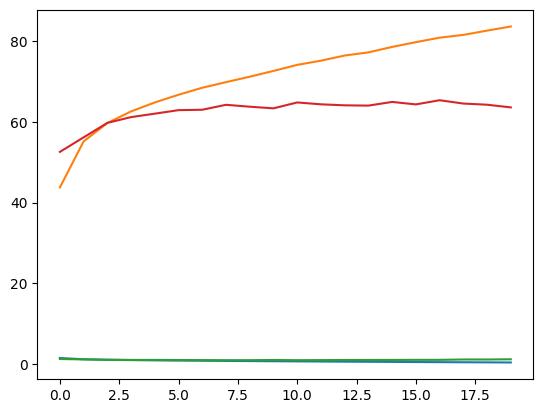

In [95]:
plt.plot(train_loss_output)
plt.plot(val_loss_output)

**TASK**: Now try to make as small network as possible.

## How to save/load your model?

In [96]:
torch.save(model.state_dict(), './nameyormodel.pth')

In [97]:
model.load_state_dict(torch.load('./nameyormodel.pth'))

<ipython-input-97-86e0fb1bdd8b>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./nameyormodel.pth'))


<All keys matched successfully>

# Transfer Learning Allmighty!

In [98]:
!pip install timm

In [99]:
import timm

In [100]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [101]:
import torch.nn as nn

In [102]:
model = timm.create_model('densenetblur121d', pretrained = True) #'convnext_small_384_in22ft1k'

model.classifier.out_features = 10

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

In [103]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (norm0): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (norm1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (norm2): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): ReLU(inplace=True)
    )
    (pool0): Sequential(
      (0): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
      (1): BlurPool2d()
    )
    (denseblock1): DenseBlock(
      (denselayer1): Dens

In [104]:
for p in model.parameters():
  p.requires_grad = False

In [105]:
model.classifier.weight.requires_grad = True
model.classifier.bias.requires_grad = True

In [106]:
for p in model.parameters():
  print(p)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
        0.9348, 1.1320, 0.9139, 1.0276, 1.4561, 1.4314, 0.8689, 0.9026, 1.3135,
        0.9602, 0.8418, 0.5120, 1.1448, 0.5463, 1.2362, 0.8183, 0.9065, 0.9412,
        0.9027, 0.6574, 0.8160, 0.9977, 1.2783, 1.0312, 1.0457, 0.8363, 1.0122,
        0.8444, 0.9761, 0.7587, 1.2415, 0.9922, 0.9574, 0.6609, 1.4096, 0.8979,
        1.1533, 1.0591, 0.9766, 0.9189, 0.9705, 0.9408, 1.4699, 0.8100, 1.3997,
        1.4855, 1.0551, 0.9748, 0.7560, 1.7544, 0.7178, 1.1512, 0.7077, 1.3195,
        0.9128, 0.4789, 0.9071, 1.0760, 1.2889, 0.6182, 1.0363, 0.7316, 0.6778,
        1.2244, 0.8591, 1.0392, 0.7481, 0.7725, 0.5945, 1.0146, 1.0362, 1.0853,
        0.9156, 0.6865, 1.0861, 0.9491, 1.4303, 1.0236, 1.0678, 1.1315, 1.0518,
        1.1568, 0.9772, 1.2470, 0.8630, 1.1946, 0.7261, 0.9597, 0.7139, 0.5565,
        0.7296, 0.8748, 1.0827, 0.7583, 1.2628, 0.3695, 1.0904, 0.8228, 0.6955,
        0.8518, 1.1913, 1.0202, 0.9997, 1.

In [107]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 6, eta_min = 0, verbose = False)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [108]:
model = model.to(device)

In [109]:
num_epochs = 6
train_loss_output = []
val_loss_output = []

for epoch in range(1, num_epochs + 1):
    print('Epoch: ')
    tr_loss = train(model=model,
                    train_loader=trainloader,
                    optimizer=optimizer
                    )
    vl_loss = test(model, testloader)

    train_loss_output.append(tr_loss)
    val_loss_output.append(vl_loss)

Epoch: 

Train loss: 6.4716
Train Accuracy: 4.58 %

Validation loss: 4.7030
Validation Accuracy: 10.81 %
Epoch: 

Train loss: 3.3768
Train Accuracy: 20.46 %

Validation loss: 3.2476
Validation Accuracy: 25.03 %
Epoch: 

Train loss: 2.6086
Train Accuracy: 30.96 %

Validation loss: 2.6448
Validation Accuracy: 32.98 %
Epoch: 

Train loss: 2.2481
Train Accuracy: 36.78 %

Validation loss: 2.3076
Validation Accuracy: 38.09 %
Epoch: 

Train loss: 2.0344
Train Accuracy: 40.84 %

Validation loss: 2.1128
Validation Accuracy: 40.87 %
Epoch: 

Train loss: 1.8861
Train Accuracy: 43.82 %

Validation loss: 1.9628
Validation Accuracy: 43.13 %


In [111]:
#plt.imshow(model.conv1.weight[0].permute(1,2,0).cpu().detach().numpy())

**HOMEWORK**

1) Using Matplotlib, visualise selected kernels from your convolution neural network above (feel free to update it, if it make the visualisation better) and on a picture demonstrate kernel's effect on a picture.
2) Incorporate dropout and regularisation into the convolution network and observe the impact.

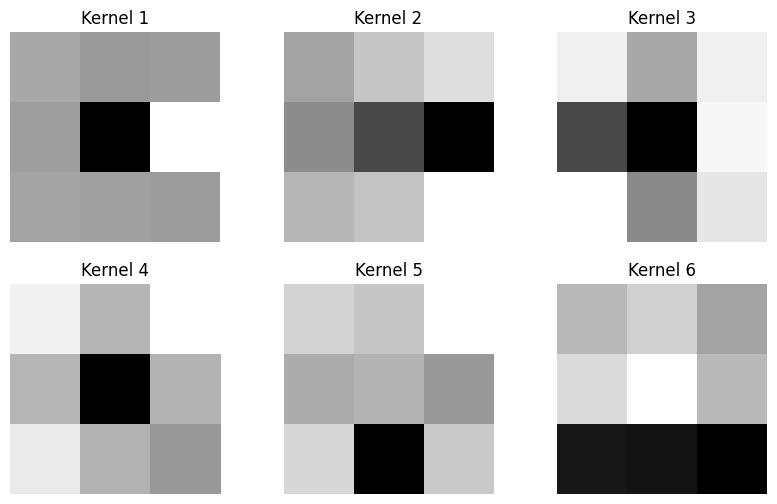

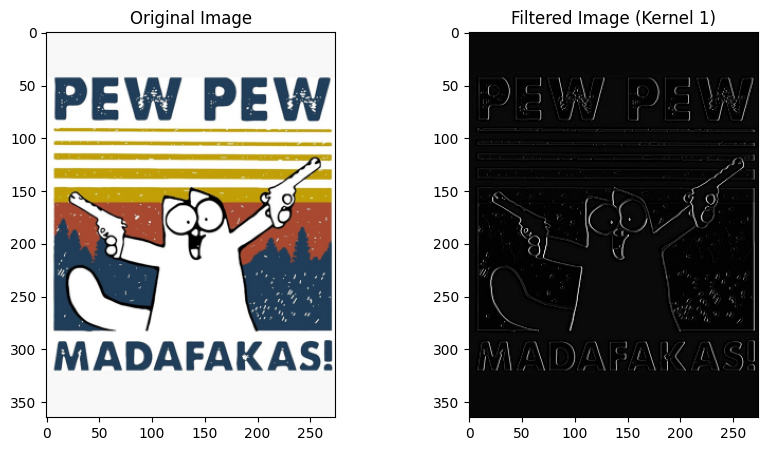

Epoch 1/20

Train loss: 1.7295
Train Accuracy: 36.89 %

Validation loss: 1.4485
Validation Accuracy: 47.15 %
Epoch 2/20

Train loss: 1.4220
Train Accuracy: 48.62 %

Validation loss: 1.3051
Validation Accuracy: 52.71 %
Epoch 3/20

Train loss: 1.2843
Train Accuracy: 53.83 %

Validation loss: 1.2036
Validation Accuracy: 57.08 %
Epoch 4/20

Train loss: 1.1855
Train Accuracy: 57.52 %

Validation loss: 1.1456
Validation Accuracy: 58.22 %
Epoch 5/20

Train loss: 1.1183
Train Accuracy: 59.85 %

Validation loss: 1.1098
Validation Accuracy: 60.28 %
Epoch 6/20

Train loss: 1.0597
Train Accuracy: 62.22 %

Validation loss: 1.0684
Validation Accuracy: 61.86 %
Epoch 7/20

Train loss: 1.0174
Train Accuracy: 63.83 %

Validation loss: 1.0308
Validation Accuracy: 63.31 %
Epoch 8/20

Train loss: 0.9868
Train Accuracy: 64.61 %

Validation loss: 1.0255
Validation Accuracy: 63.05 %
Epoch 9/20

Train loss: 0.9467
Train Accuracy: 66.31 %

Validation loss: 0.9996
Validation Accuracy: 64.38 %
Epoch 10/20

Train 

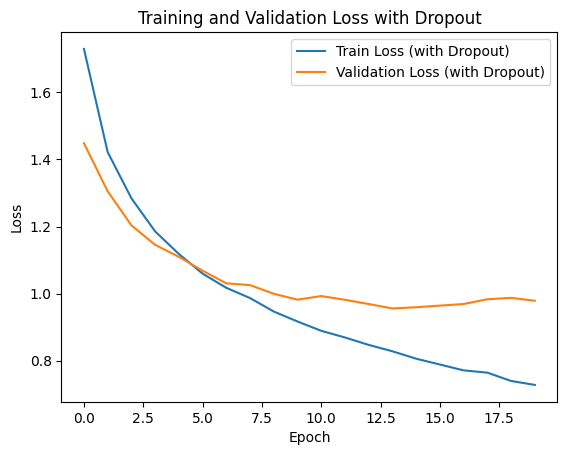

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
from urllib.request import urlopen

# 1. Visualize Kernels

kernels = model.features.conv0.weight.cpu().detach().numpy()

# Visualize the first 6 kernels
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    if i < kernels.shape[0]:
        ax.imshow(kernels[i, 0, :, :], cmap='gray')
        ax.set_title(f"Kernel {i + 1}")
    ax.axis('off')
plt.show()


# 2. Demonstrate Kernel Effect
def apply_kernel(image, kernel):
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image

    filtered_image = cv2.filter2D(image_gray, -1, kernel)
    return filtered_image


first_kernel = kernels[0, 0, :, :]
filtered_img = apply_kernel(image, first_kernel)

# Display original and filtered images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(filtered_img, cmap="gray")
ax[1].set_title("Filtered Image (Kernel 1)")
plt.show()


# 2. Incorporate Dropout and Regularization

class CNN_with_dropout(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(3, 3), padding=1, stride=(1, 1))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, padding=1, kernel_size=(3, 3))
        self.fc1 = nn.Linear(in_features=16 * 8 * 8, out_features=120)
        self.dropout = nn.Dropout(p=dropout_rate)  # Added dropout layer
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_with_dropout = CNN_with_dropout()
optimizer_dropout = torch.optim.AdamW(model_with_dropout.parameters(), lr=0.0001)

model_with_dropout = CNN_with_dropout(dropout_rate=0.2).to(device)

optimizer_dropout = torch.optim.AdamW(model_with_dropout.parameters(), lr=0.001)

num_epochs = 20
train_loss_dropout = []
val_loss_dropout = []

for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")

    tr_loss, tr_acc = train(model=model_with_dropout,
                            train_loader=trainloader,
                            optimizer=optimizer_dropout)
    train_loss_dropout.append(tr_loss)

    vl_loss, vl_acc = test(model=model_with_dropout, test_loader=testloader)
    val_loss_dropout.append(vl_loss)

# Show results
plt.plot(train_loss_dropout, label="Train Loss (with Dropout)")
plt.plot(val_loss_dropout, label="Validation Loss (with Dropout)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss with Dropout")
plt.show()